In [21]:
import pandas as pd 
fromage=pd.read_table(r"fromage.txt",sep="\t",header=0,index_col=0) 
print(fromage.describe()) 

         calories      sodium     calcium    lipides     retinol    folates  \
count   29.000000   29.000000   29.000000  29.000000   29.000000  29.000000   
mean   300.034483  210.086207  185.734483  24.158621   67.562069  13.010345   
std     91.914356  108.678923   72.528882   8.129642   24.163098  11.723339   
min     70.000000   22.000000   72.600000   3.400000   37.100000   1.200000   
25%    292.000000  140.000000  132.900000  23.400000   51.600000   4.900000   
50%    321.000000  223.000000  202.300000  26.300000   62.300000   6.400000   
75%    355.000000  276.000000  220.500000  29.100000   76.400000  21.100000   
max    406.000000  432.000000  334.600000  33.300000  150.500000  36.400000   

       proteines  cholesterol  magnesium  
count  29.000000    29.000000  29.000000  
mean   20.168966    74.586207  26.965517  
std     6.959788    28.245755  11.318388  
min     4.100000    10.000000  10.000000  
25%    17.800000    70.000000  20.000000  
50%    21.000000    80.000000 

array([[<Axes: xlabel='calories', ylabel='calories'>,
        <Axes: xlabel='sodium', ylabel='calories'>,
        <Axes: xlabel='calcium', ylabel='calories'>,
        <Axes: xlabel='lipides', ylabel='calories'>,
        <Axes: xlabel='retinol', ylabel='calories'>,
        <Axes: xlabel='folates', ylabel='calories'>,
        <Axes: xlabel='proteines', ylabel='calories'>,
        <Axes: xlabel='cholesterol', ylabel='calories'>,
        <Axes: xlabel='magnesium', ylabel='calories'>],
       [<Axes: xlabel='calories', ylabel='sodium'>,
        <Axes: xlabel='sodium', ylabel='sodium'>,
        <Axes: xlabel='calcium', ylabel='sodium'>,
        <Axes: xlabel='lipides', ylabel='sodium'>,
        <Axes: xlabel='retinol', ylabel='sodium'>,
        <Axes: xlabel='folates', ylabel='sodium'>,
        <Axes: xlabel='proteines', ylabel='sodium'>,
        <Axes: xlabel='cholesterol', ylabel='sodium'>,
        <Axes: xlabel='magnesium', ylabel='sodium'>],
       [<Axes: xlabel='calories', ylabel='calc

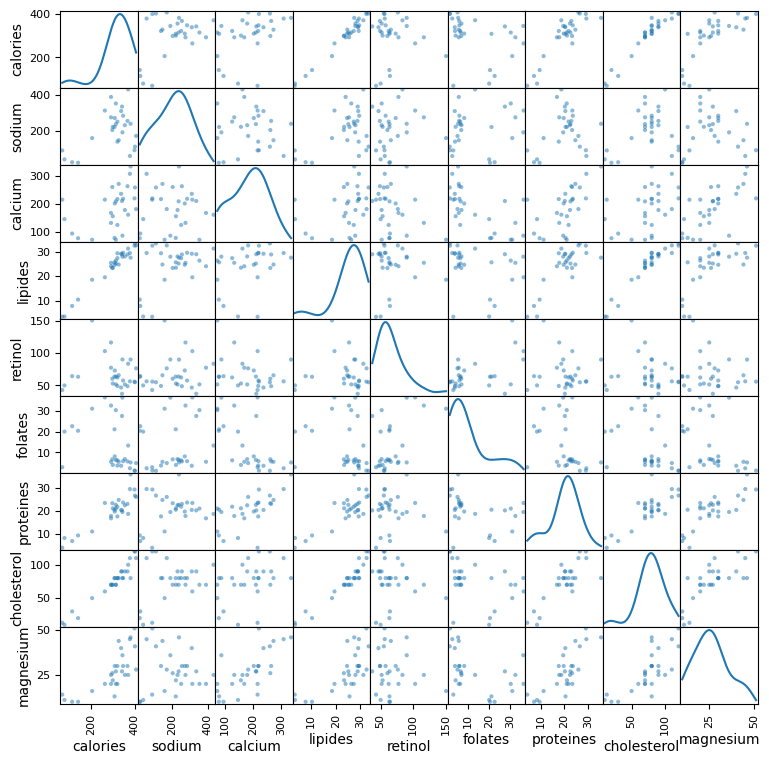

In [22]:
pd.plotting.scatter_matrix(fromage, figsize=(9,9),diagonal="kde") 

In [23]:
import numpy as np 
from sklearn import cluster 
np.random.seed(0) 
kmeans = cluster.KMeans(n_clusters = 4) 
kmeans_groups=kmeans.fit_predict(fromage) 
idk = np.argsort(kmeans.labels_) 
print("\n Classification des instances\n",pd.DataFrame(fromage.index[idk],kmeans.labels_[idk])) 



 Classification des instances
              Fromages
0      Fr.frais20nat.
0  Yaourtlaitent.nat.
0       Petitsuisse40
0      Fr.frais40nat.
1         Fr.fondu.45
1             Babybel
1              Cantal
1                Bleu
1           Maroilles
1           Reblochon
1            Pyrenees
1            Parmesan
1             Morbier
1           Camembert
1          Rocquefort
1         SaintPaulin
2         CarredelEst
2           Chabichou
2         PontlEveque
2                Tome
2            Chaource
2  Fr.chevrepatemolle
2         Coulomniers
3            Beaufort
3            Emmental
3             Cheddar
3               Comte
3                Edam
3            Vacherin


1. Analyse Graphique 

On ne peut pas visualiser le clustering avec notre matrice de données actuelle car elle contient 29 attributs.Pour ce faire, il faut réduire le nombre de colonnes à 2 sans perte significative d'information. Ceci peut être réalisé avec des algorithmes de réduction de dimension,notamment PCA.

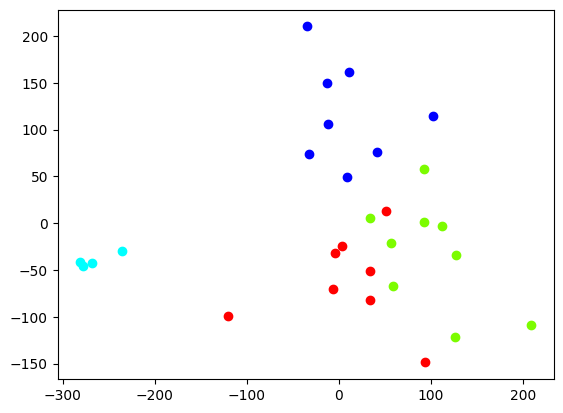

In [112]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
acp = PCA(n_components =2).fit_transform(fromage)
#visualiser la classification
for couleur,k in zip(['red','blue','lawngreen', 'aqua'],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()

In [24]:
distances=kmeans.transform(fromage)
print("\n Distance de chaque instance de chacun des clusters\n",distances) 
assigned_distances=np.min(distances,axis=1)


 Distance de chaque instance de chacun des clusters
 [[384.27301005 164.65799003 123.59715669 298.50120835]
 [303.10311983  59.83458042 110.54651897 139.99964782]
 [349.91323389 202.02686376 235.25665316  38.57004091]
 [393.76898843  57.68287164 159.09984736 223.14028784]
 [332.43471728  87.28012573 141.19170858 234.87900727]
 [371.97076666  69.17840714 180.75982487 138.46426033]
 [298.65300308 172.41342856  72.0404549  181.39183569]
 [311.48990553 113.66307821  57.86280572 219.62017528]
 [348.48685233 150.72833293 156.41570984  89.43607432]
 [333.83554522 217.03242925 224.31195752  50.14975629]
 [285.29211565 162.12213096  39.94716153 207.32987738]
 [293.81905359 153.99473047 197.13338124  65.07112562]
 [343.1669947  255.01734323 289.57992728  89.49859248]
 [195.86579908 253.78467319 144.41931015 266.44478113]
 [400.47054979 119.56802254 164.74401355 294.09844393]
 [ 27.57918146 372.34989864 307.24796873 334.63622247]
 [ 48.43507252 371.8670085  286.92623741 323.74277555]
 [379.74839

In [25]:
df = pd.DataFrame({
    'distance': assigned_distances,
    'cluster': kmeans.labels_
})
mean_distances_per_cluster = df.groupby('cluster')['distance'].mean()
print(" \n Distance moyenne de chaque cluster\n ",mean_distances_per_cluster)

 
 Distance moyenne de chaque cluster
  cluster
0    62.571961
1    80.478657
2    78.420260
3    66.558162
Name: distance, dtype: float64


On remarque que les distances moyennes des clusters 0 et 3 sont  relativement faibles. Ceci indique une forte cohésion interne.
Les cluster 1 et 2  présentent des distance moyennes significativement plus élevées ce qui indique une faible cohésion interne.
▶️ Ces résultats confirment l'anlyse préliminaire  de l'expert.
▶️L'expert explique que les fromages de la catégorie 2 ont bien une pâte molle ,mais ont des différences savorielles remarquables,ce qui explique la distance moyenne élevée.

In [26]:
from scipy.spatial.distance import cdist

inter_cluster_distances = cdist(kmeans.cluster_centers_, kmeans.cluster_centers_, metric='euclidean')
print("distances entre clusters\n",inter_cluster_distances)

distances entre clusters
 [[  0.         356.33815215 285.80825834 316.22252076]
 [356.33815215   0.         135.98467391 180.03539949]
 [285.80825834 135.98467391   0.         203.8912244 ]
 [316.22252076 180.03539949 203.8912244    0.        ]]


[0.50681355 0.37931202 0.31556786 0.33551179 0.26903841 0.25530423
 0.24609412 0.25385808 0.24764245]


<function matplotlib.pyplot.show(close=None, block=None)>

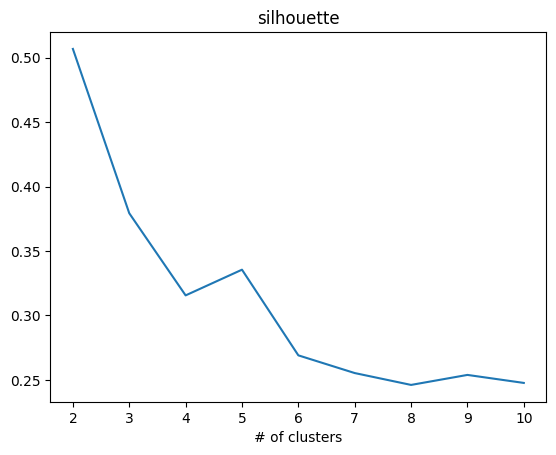

In [27]:
from sklearn import  metrics

#utilisation de la métrique "silhouette"  
res = np.arange(9, dtype ="double") 
for k in np.arange(9): 
    km = cluster.KMeans(n_clusters = k+2) 
    km.fit(fromage) 
    res[k] = metrics.silhouette_score(fromage,km.labels_) 
print (res) 
#graphique 
import matplotlib.pyplot as plt 
plt.title("silhouette") 
plt.xlabel("# of clusters") 
plt.plot(np.arange(2,11,1),(res)) 
plt.show 

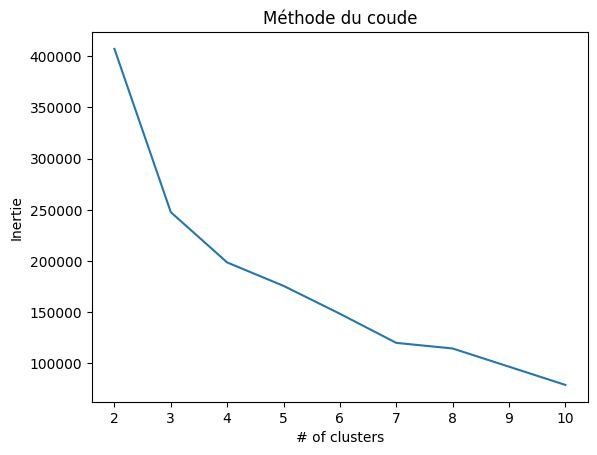

In [28]:
import numpy as np
from sklearn import metrics, cluster
import matplotlib.pyplot as plt

inertie = np.arange(9, dtype="double")
for k in np.arange(9): 
    km = cluster.KMeans(n_clusters=k+2) 
    km.fit(fromage) 
    inertie[k] = km.inertia_

plt.title("Méthode du coude")
plt.xlabel("# of clusters")
plt.ylabel("Inertie")
plt.plot(np.arange(2, 11), inertie)  
plt.show()


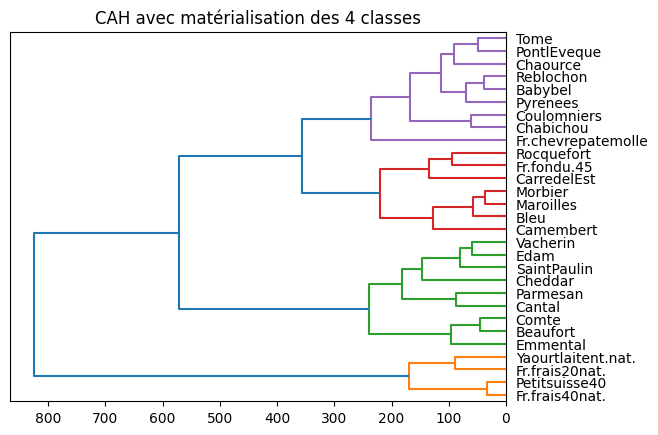

Groupes CAH (scipy)
[3 4 2 3 3 2 4 4 2 2 4 2 2 4 3 1 1 3 3 2 1 4 4 4 3 2 4 2 1]
             Fromages
1      Fr.frais20nat.
1  Yaourtlaitent.nat.
1       Petitsuisse40
1      Fr.frais40nat.
2               Comte
2            Beaufort
2             Cheddar
2              Cantal
2            Parmesan
2                Edam
2            Vacherin
2         SaintPaulin
2            Emmental
3         Fr.fondu.45
3         CarredelEst
3                Bleu
3          Rocquefort
3           Camembert
3             Morbier
3           Maroilles
4             Babybel
4         Coulomniers
4           Chabichou
4            Chaource
4  Fr.chevrepatemolle
4           Reblochon
4         PontlEveque
4            Pyrenees
4                Tome


In [32]:
import pandas 
import numpy as np 
#librairies pour la CAH 
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster 
Z = linkage(fromage,method='ward', metric='euclidean') 
#affichage du dendrogramme 
plt.title("CAH") 
plt.title('CAH avec matérialisation des 4 classes') 
dendrogram(Z,labels=fromage.index,orientation='left',color_threshold=255) 
plt.show() 
groupes_cah = fcluster(Z, t = 255,criterion='distance') 
print("Groupes CAH (scipy)")
print(groupes_cah) 
#index triés des groupes 
idg = np.argsort(groupes_cah) 
#affichage des observations et leurs groupes 
print(pandas.DataFrame(fromage.index[idg],groupes_cah[idg]))

In [33]:
correspondance = pd.crosstab(groupes_cah, kmeans_groups).rename_axis(None, axis='index').rename_axis(None, axis='columns')
print("Matrice de contingence entre CAH (scipy) et K-means")
print(correspondance)

Matrice de contingence entre CAH (scipy) et K-means
   0  1  2  3
1  4  0  0  0
2  0  3  0  6
3  0  6  1  0
4  0  3  6  0


In [31]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
groupes_cah_sklearn = model.fit_predict(fromage)
print("Groupes CAH (Scikit-learn):")
print(groupes_cah)
idg = np.argsort(groupes_cah)
grouped_data = pd.DataFrame(fromage.index[idg], groupes_cah[idg])
print("\nObservations et groupes :")
print(grouped_data)

Groupes CAH (Scikit-learn):
[3 4 2 3 3 2 4 4 2 2 4 2 2 4 3 1 1 3 3 2 1 4 4 4 3 2 4 2 1]

Observations et groupes :
             Fromages
1      Fr.frais20nat.
1  Yaourtlaitent.nat.
1       Petitsuisse40
1      Fr.frais40nat.
2               Comte
2            Beaufort
2             Cheddar
2              Cantal
2            Parmesan
2                Edam
2            Vacherin
2         SaintPaulin
2            Emmental
3         Fr.fondu.45
3         CarredelEst
3                Bleu
3          Rocquefort
3           Camembert
3             Morbier
3           Maroilles
4             Babybel
4         Coulomniers
4           Chabichou
4            Chaource
4  Fr.chevrepatemolle
4           Reblochon
4         PontlEveque
4            Pyrenees
4                Tome


In [35]:
correspondance = pd.crosstab(groupes_cah, groupes_cah_sklearn).rename_axis(None, axis='index').rename_axis(None, axis='columns')
print("Matrice de contingence entre CAH (scipy) etCAH (sklearn)")
print(correspondance)

Matrice de contingence entre CAH (scipy) etCAH (sklearn)
   0  1  2  3
1  0  0  0  4
2  9  0  0  0
3  0  7  0  0
4  0  0  9  0


In [113]:
import numpy as np

# Fonction pour calculer la dissimilarité moyenne entre tous les objets d'un cluster
def dissimilarity_average(cluster, distance_matrix):
    avg_dissimilarities = []
    for i in cluster:
        avg_dissimilarity = np.mean([distance_matrix[i][j] for j in cluster if i != j])
        avg_dissimilarities.append(avg_dissimilarity)
    return avg_dissimilarities

# Fonction pour calculer la différence de dissimilarité pour chaque objet entre deux clusters
def dissimilarity_diff(i, A, B, distance_matrix):
    d_A = np.mean([distance_matrix[i][a] for a in A]) #moyenne de la distance de i de chaque élement de A
    d_B = np.mean([distance_matrix[i][b] for b in B]) #moyenne de la distance de i de chaque élement de B
    return d_A - d_B

# L'algorithme de partitionnement
def split_clusters(objects, distance_matrix, k):
    clusters = [list(range(len(objects)))]  # commencer  avec un seul cluster contenant tous les objets
    while len(clusters) < k and len(clusters) < len(objects):
        # Trouver le cluster ayant la plus grande dissimilarité
        max_dissimilarity = -1
        cluster_to_split = None
        for cluster in clusters:
            avg_dissimilarities = dissimilarity_average(cluster, distance_matrix)
            max_avg_dissimilarity = max(avg_dissimilarities)
            if max_avg_dissimilarity > max_dissimilarity:
                max_dissimilarity = max_avg_dissimilarity
                cluster_to_split = cluster
        # Diviser le cluster en deux classes A et B
        A = cluster_to_split.copy()
        B = []
        
        # Trouver l'objet m ayant la plus grande dissimilarité moyenne dans A
        m_index = np.argmax([dissimilarity_average(A, distance_matrix)[i] for i in range(len(A))])
        m = A[m_index]
        A.remove(m)
        B.append(m)

        # Répartir les objets restants entre A et B en fonction de la dissimilarité moyenne
        continue_split = True
        while continue_split:
            continue_split = False
            for i in A[:]:  
                diff = dissimilarity_diff(i, A, B, distance_matrix)
                if diff > 0:  
                    A.remove(i)
                    B.append(i)
                    continue_split = True
                    break
        
        # Ajouter les nouveaux clusters à la liste
        clusters.remove(cluster_to_split)
        clusters.append(A)
        clusters.append(B)
        
    return clusters

In [117]:
dissimilarity_matrix = cdist(fromage, fromage, metric='euclidean')
print(split_clusters(fromage,dissimilarity_matrix,4))

[[0, 1, 3, 4, 5, 6, 7, 10, 14, 17, 18, 21, 22, 23, 24, 26], [12, 2, 8, 9, 11, 19, 27, 25], [15, 16, 20, 28], [13]]
